In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the evaluation log file
with open('../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/eval_disturbance_horizon_14_measure_pick_position_and_time_prob_1.0_vel_0.0017_gripper_dir_near_gripper_0.05_200episode/eval_log.json', 'r') as f:
    eval_data = json.load(f)


In [2]:
success_lst = list()
distance_lst = list()
for i in range(200):
    
    if eval_data[f'test/sim_distance_to_normal_object_pos_{100000+i}'] != -1:
        if eval_data[f'test/sim_triggered_time_{100000+i}'] < 4:
            success_lst.append(eval_data[f'test/sim_max_reward_{100000+i}'])
            distance_lst.append(eval_data[f'test/sim_distance_to_normal_object_pos_{100000+i}'])

success_lst = np.array(success_lst)
distance_lst = np.array(distance_lst)

0.5


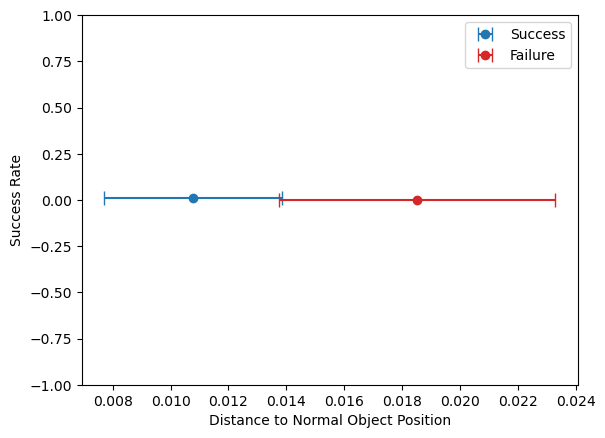

In [3]:
success_mask = success_lst > 0.9

# Calculate mean and std for success and failure cases
success_mean = np.mean(distance_lst[success_mask])
success_std = np.std(distance_lst[success_mask])
failure_mean = np.mean(distance_lst[~success_mask]) 
failure_std = np.std(distance_lst[~success_mask])

# plt.scatter(distance_lst[success_mask], np.full_like(distance_lst[success_mask], 0.1), color='tab:blue', label='Success')
# plt.scatter(distance_lst[~success_mask], np.full_like(distance_lst[~success_mask], -0.1), color='tab:red', label='Failure')
plt.ylim([-1, 1])
plt.errorbar(success_mean, 0.01, xerr=success_std, fmt='o', color='tab:blue', label='Success', capsize=5)
plt.errorbar(failure_mean, 0, xerr=failure_std, fmt='o', color='tab:red', label='Failure', capsize=5)
plt.xlabel('Distance to Normal Object Position')
plt.ylabel('Success Rate')
plt.legend()
print(success_mask.sum()/len(success_mask))

In [37]:
success_mask.sum()

10

In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the evaluation log file
with open('../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/eval_disturbance_horizon_14_measure_pick_position_and_time_prob_1.0_vel_0.0017_gripper_dir_near_gripper_0.05_200episode/eval_log.json', 'r') as f:
    eval_data = json.load(f)


In [14]:
success_lst = list()
timing_lst = list()
for i in range(200):
    
    if eval_data[f'test/sim_distance_to_normal_object_pos_{100000+i}'] != -1:
        success_lst.append(eval_data[f'test/sim_max_reward_{100000+i}'])
        timing_lst.append(eval_data[f'test/sim_triggered_time_{100000+i}'])

success_lst = np.array(success_lst)
timing_lst = np.array(timing_lst)

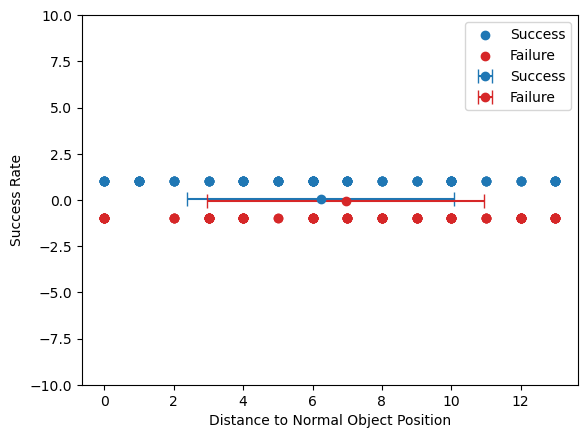

In [15]:
success_mask = success_lst > 0.9

# Calculate mean and std for success and failure cases
success_mean = np.mean(timing_lst[success_mask])
success_std = np.std(timing_lst[success_mask])
failure_mean = np.mean(timing_lst[~success_mask]) 
failure_std = np.std(timing_lst[~success_mask])

plt.scatter(timing_lst[success_mask], np.full_like(timing_lst[success_mask], 1), color='tab:blue', label='Success')
plt.scatter(timing_lst[~success_mask], np.full_like(timing_lst[~success_mask], -1), color='tab:red', label='Failure')
plt.ylim([-10, 10])
plt.errorbar(success_mean, 0.05, xerr=success_std, fmt='o', color='tab:blue', label='Success', capsize=5)
plt.errorbar(failure_mean, -0.05, xerr=failure_std, fmt='o', color='tab:red', label='Failure', capsize=5)
plt.xlabel('Distance to Normal Object Position')
plt.ylabel('Success Rate')
plt.legend()

In [1]:
# plot the distance between intended grasping position and box when first graspping signal has been sampled w.r.t the timing
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the evaluation log file
with open('../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/eval_disturbance_horizon_14_measure_pick_position_and_time_prob_1.0_vel_0.0017_gripper_dir_near_gripper_0.05_200episode/eval_log.json', 'r') as f:
    eval_data_move = json.load(f)
    
with open('../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/eval_disturbance_horizon_14_measure_pick_position_and_time_prob_1.0_vel_0.0000_gripper_dir_near_gripper_0.05/eval_log.json', 'r') as f:
    eval_data_stop = json.load(f)

In [2]:
mov_timing_lst = {i: [] for i in range(14)}
stop_timing_lst = {i: [] for i in range(14)}
for i in range(200):

    if eval_data_move[f'test/sim_distance_to_normal_object_pos_{100000+i}'] != -1:
        mov_timing_lst[eval_data_move[f'test/sim_triggered_time_{100000+i}']].append(eval_data_move[f'test/sim_distance_to_normal_object_pos_{100000+i}'])
    if eval_data_stop[f'test/sim_distance_to_normal_object_pos_{100000+i}'] != -1:
        stop_timing_lst[eval_data_stop[f'test/sim_triggered_time_{100000+i}']].append(eval_data_stop[f'test/sim_distance_to_normal_object_pos_{100000+i}'])

i: 0, mov_mean: 0.01631112001816536, stop_mean: 0.008573188655228084, diff: 0.007737931362937276
i: 1, mov_mean: 0.011385514481992487, stop_mean: 0.00996476011245975, diff: 0.0014207543695327375
i: 2, mov_mean: 0.013698844133173337, stop_mean: 0.009802370566315015, diff: 0.0038964735668583217
i: 3, mov_mean: 0.015051559950697185, stop_mean: 0.012288263075479693, diff: 0.0027632968752174924
i: 4, mov_mean: 0.012418581960620803, stop_mean: 0.011676978618862272, diff: 0.0007416033417585316
i: 5, mov_mean: 0.00977893465679202, stop_mean: 0.010711156815518255, diff: -0.0009322221587262352
i: 6, mov_mean: 0.011563849642053554, stop_mean: 0.011177991350495872, diff: 0.00038585829155768185
i: 7, mov_mean: 0.012323626730997744, stop_mean: 0.009800824321806848, diff: 0.0025228024091908958
i: 8, mov_mean: 0.011273925674979235, stop_mean: 0.011344946630344079, diff: -7.102095536484429e-05
i: 9, mov_mean: 0.012274069308440333, stop_mean: 0.010403594675632184, diff: 0.0018704746328081483
i: 10, mov_

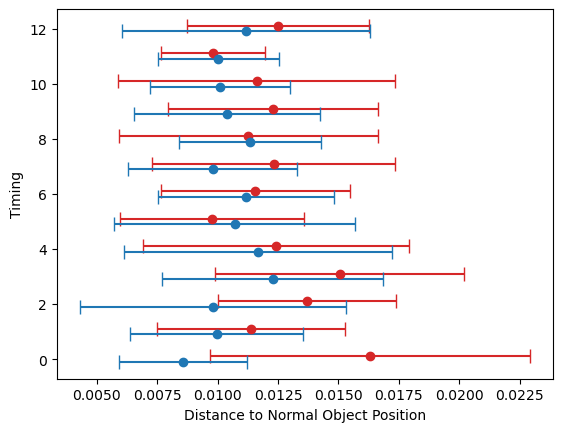

In [21]:
for i in range(13):
    # Plot scatter points for move data
    # plt.scatter(mov_timing_lst[i], np.full_like(mov_timing_lst[i], i+0.2), color='tab:red', label='Move', alpha=0.5)
    
    # Calculate and plot mean and std for move data if there are points
    if len(mov_timing_lst[i]) > 0:
        mov_mean = np.mean(mov_timing_lst[i])
        mov_std = np.std(mov_timing_lst[i])
        plt.errorbar(mov_mean, i+0.1, xerr=mov_std, fmt='o', color='tab:red', capsize=5, label='Move')
        
    # Plot scatter points for stop data
    # plt.scatter(stop_timing_lst[i], np.full_like(stop_timing_lst[i], i)-0.2, color='tab:blue', label='Stop', alpha=0.5)
    
    # Calculate and plot mean and std for stop data if there are points
    if len(stop_timing_lst[i]) > 0:
        stop_mean = np.mean(stop_timing_lst[i])
        stop_std = np.std(stop_timing_lst[i])
        plt.errorbar(stop_mean, i-0.1, xerr=stop_std, fmt='o', color='tab:blue', capsize=5, label='Stop')
    print(f"i: {i}, mov_mean: {mov_mean}, stop_mean: {stop_mean}, diff: {(mov_mean - stop_mean)}")
plt.xlabel('Distance to Normal Object Position')
plt.ylabel('Timing')
# plt.legend()
plt.show()


In [17]:
for key, value in mov_timing_lst.items():
    print(key, len(value))

0 17
1 8
2 9
3 16
4 19
5 9
6 23
7 15
8 15
9 12
10 18
11 8
12 16
13 15


In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the evaluation log file
with open('../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/eval_disturbance_horizon_14_measure_distance_when_grasping_sampled_prob_1.0_vel_0.0000_gripper_dir_near_gripper_0.05/eval_log.json', 'r') as f:
    eval_data = json.load(f)


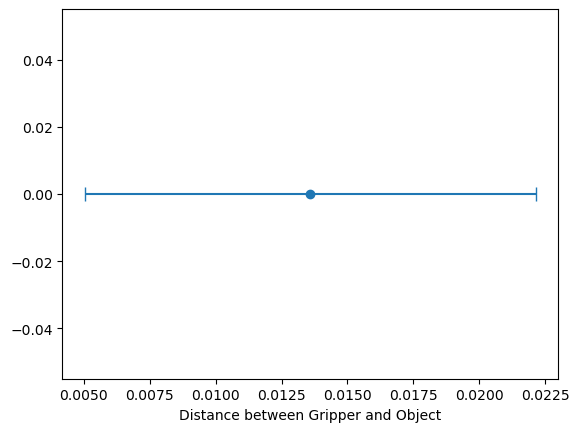

In [6]:
# Collect distances
gripper2object_distance_lst = []
for i in range(100):
    gripper2object_distance_lst.append(eval_data[f'test/sim_gripper2object_distance_{100000+i}'])
gripper2object_distance_lst = np.array(gripper2object_distance_lst)

# Calculate mean and std
mean_distance = np.mean(gripper2object_distance_lst)
std_distance = np.std(gripper2object_distance_lst)

# Plot mean and std
plt.errorbar(mean_distance, 0, xerr=std_distance, fmt='o', color='tab:blue', capsize=5)
plt.xlabel('Distance between Gripper and Object')
plt.ylabel('')
plt.show()


In [7]:
print(max(gripper2object_distance_lst))

0.04856493671098711
